<a href="https://colab.research.google.com/github/Barbhuiya12/Hydrology-/blob/main/IMD_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing The IMDLIB**
---

IMDLIB is a python package to download and handle binary gridded data from the India Meteorological Department (IMD). For more information about the IMD datasets, the link of IMD Pune may be referred. It heavily employs the xarray for processing the datasets.

In [4]:
pip install imdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the library and downloading the data** 

In [5]:
import imdlib as imd
start_yr = 2010
end_yr =2020
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = (r"D:\Metrological data\Rainfall data\Kolar dam") #Path to save the files

data=imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)
data

Downloading: rain for year 2010
Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Downloading: rain for year 2019
Downloading: rain for year 2020
Download Successful !!!


In [6]:
ds = data.get_xarray()
print(ds)

<xarray.Dataset>
Dimensions:  (time: 4018, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Data variables:
    rain     (time, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-10-14 11:33:43.391981 Python
    references:   
    comment:      
    crs:          epsg:4326


**Converting The available data in CSV(Comma Separated Value) format**

In [7]:
lat = 24
lon = 79.25
x=data.to_csv('Sonar 24 79.25.csv', lat, lon, file_dir)

**Plotting the Rainfall map**

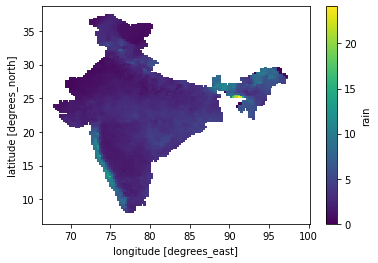

In [11]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()